<u>***Phase 3: Exploratory Data Analysis***<u>

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("E:/Projects/airbnb-nyc-capstone/data/cleaned/cleaned_airbnb_nyc_data.csv")

data.columns

data['host_identity_verified'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_16612\4044213671.py:6: DtypeWarning:

Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.



array(['unconfirmed', 'verified', nan], dtype=object)

***Analyze price distribution across boroughs***

In [180]:
price_details= data.groupby('neighbourhood group').agg(
    avg_price=('price', 'mean'),
    median_price=('price', 'median'),
    max_price=('price', 'max'),
    min_price=('price', 'min'),
    total_count=('id', 'count')
).reset_index()

# price_details.to_csv("../data/cleaned/price_details.csv", index=False)
price_details = pd.DataFrame(data.groupby('neighbourhood group').agg(
    avg_price=('price', 'mean'),
    median_price=('price', 'median'),
    max_price=('price', 'max'),
    min_price=('price', 'min'),
    total_count=('id', 'count')
).reset_index()
)

price_details

,neighbourhood group,avg_price,median_price,max_price,min_price,total_count
0,Bronx,627.766359,633.0,1200.0,50.0,2712
1,Brooklyn,626.561078,626.0,1200.0,50.0,41843
2,Manhattan,622.459518,621.0,1200.0,50.0,43822
3,Queens,630.207647,628.0,1200.0,50.0,13267
4,Staten Island,624.490546,628.0,1200.0,50.0,955


***creating a graph to visulization***

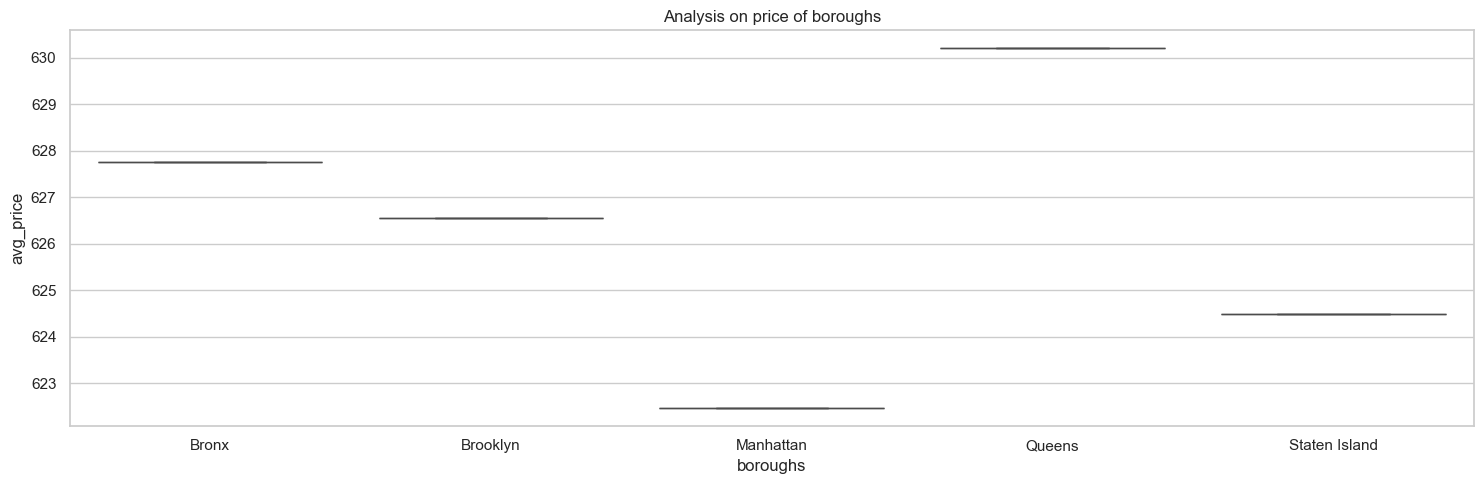

In [181]:
plt.figure(figsize=(15,5))
sns.set_theme(style='whitegrid')

sns.boxplot(data=price_details, x='neighbourhood group', y= 'avg_price')

plt.title('Analysis on price of boroughs')
plt.xlabel('boroughs')
plt.ylabel('avg_price')

plt.tight_layout()
plt.show()

analysis on availaility

In [182]:
availability_details = data.groupby(['neighbourhood group', 'room type']).agg(
    avg_days = ('availability 365', 'mean'),
    max_days = ('availability 365', 'max'),
    min_days = ('availability 365', 'min'),
    median_days = ('availability 365', 'median')
)

# availability_details.to_csv('../data/cleaned/availability_details.csv', index=False)
availability_details

avg_days  max_days  min_days  \
neighbourhood group room type                                         
Bronx               Entire home/apt  177.526736     366.0       0.0   
                    Private room     181.197025     366.0       0.0   
                    Shared room      154.756522     365.0       0.0   
Brooklyn            Entire home/apt  128.361746     366.0       0.0   
                    Hotel room       103.875000     281.0       0.0   
                    Private room     127.435735     366.0       0.0   
                    Shared room      184.930575     366.0       0.0   
Manhattan           Entire home/apt  147.222668     366.0       0.0   
                    Hotel room       226.660000     365.0       0.0   
                    Private room     129.951983     366.0       0.0   
                    Shared room      154.737649     366.0       0.0   
Queens              Entire home/apt  157.683879     366.0       0.0   
                    Hotel room       228.375000     365.0       0.0   
                    Private room     162.146441     366.0       0.0   
                    Shared room      197.043037     366.0       0.0   
Staten Island       Entire home/apt  179.516878     366.0       0.0   
                    Private room     218.577456     366.0       0.0   
                    Shared room       72.533333     312.0       0.0   

                                     median_days  
neighbourhood group room type                     
Bronx               Entire home/apt   168.000000  
                    Private room      175.000000  
                    Shared room        90.000000  
Brooklyn            Entire home/apt    88.000000  
                    Hotel room         32.000000  
                    Private room       79.000000  
                    Shared room       175.000000  
Manhattan           Entire home/apt   124.000000  
                    Hotel room        305.000000  
                    Private room       83.000000  
                    Shared room        90.000000  
Queens              Entire home/apt   141.000000  
                    Hotel room        308.000000  
                    Private room      144.000000  
                    Shared room       197.526462  
Staten Island       Entire home/apt   174.000000  
                    Private room      261.000000  
                    Shared room        37.000000

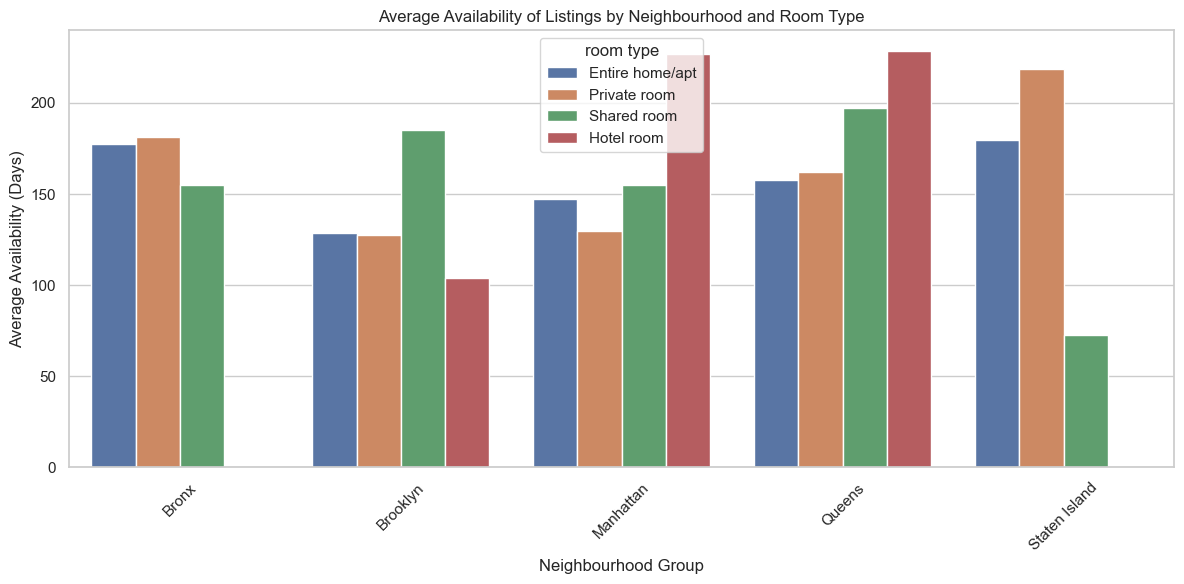

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting average availability by room type and neighbourhood group
plt.figure(figsize=(12, 6))
sns.barplot(data=availability_details.reset_index(), x='neighbourhood group', y='avg_days', hue='room type')
plt.title('Average Availability of Listings by Neighbourhood and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


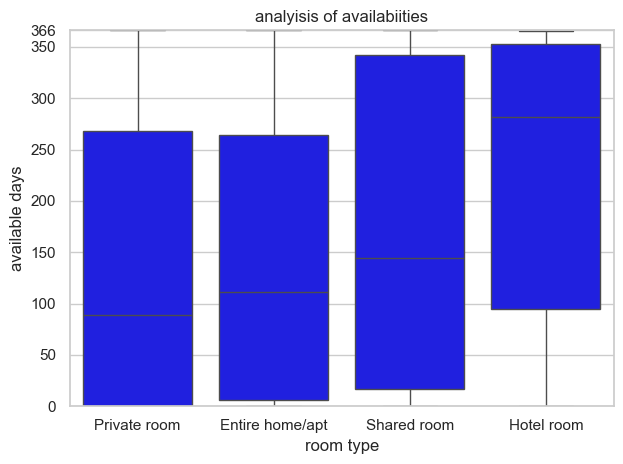

In [184]:
plt.Figure(figsize=(500,10))

sns.boxplot(data=data,x='room type',y='availability 365', color='blue')

plt.title('analyisis of availabiities')
plt.xlabel('room type')

plt.ylabel('available days')
plt.ylim(0,366)
plt.yticks(ticks=[0,50,100,150,200,250,300,350,366])

plt.tight_layout()
plt.show()

***Visualize room types and price differences***

In [185]:
room_prices = data.groupby(['neighbourhood group','room type']).agg(
    avg_price = ('price','mean'),
    max_price = ('price','max'),
    min_price = ('price','min'),
    median_price = ('price','median')
)

# room_prices.to_csv('../data/cleaned/room_prices.csv', index =False)

room_prices

avg_price  max_price  min_price  \
neighbourhood group room type                                           
Bronx               Entire home/apt  620.232581     1200.0       50.0   
                    Private room     634.710644     1200.0       50.0   
                    Shared room      600.256410     1171.0       63.0   
Brooklyn            Entire home/apt  626.896406     1200.0       50.0   
                    Hotel room       736.125000     1082.0      246.0   
                    Private room     625.868514     1200.0       50.0   
                    Shared room      634.317073     1197.0       50.0   
Manhattan           Entire home/apt  623.173943     1200.0       50.0   
                    Hotel room       681.870000     1193.0       50.0   
                    Private room     620.378866     1200.0       50.0   
                    Shared room      632.522124     1199.0       50.0   
Queens              Entire home/apt  627.030392     1200.0       50.0   
                    Hotel room       433.250000      912.0      157.0   
                    Private room     631.813996     1200.0       50.0   
                    Shared room      645.306630     1198.0       50.0   
Staten Island       Entire home/apt  642.192389     1196.0       50.0   
                    Private room     603.500000     1200.0       50.0   
                    Shared room      715.600000     1162.0      182.0   

                                     median_price  
neighbourhood group room type                      
Bronx               Entire home/apt         613.0  
                    Private room            652.0  
                    Shared room             608.0  
Brooklyn            Entire home/apt         626.0  
                    Hotel room              836.0  
                    Private room            624.0  
                    Shared room             662.0  
Manhattan           Entire home/apt         622.0  
                    Hotel room              644.5  
                    Private room            619.0  
                    Shared room             640.5  
Queens              Entire home/apt         624.0  
                    Hotel room              367.5  
                    Private room            629.0  
                    Shared room             659.5  
Staten Island       Entire home/apt         667.0  
                    Private room            588.0  
                    Shared room             680.0

Review listing counts by host and frequency

In [186]:
data.columns

data.info()

data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102599 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102599 non-null  object 
 5   neighbourhood group             102599 non-null  object 
 6   neighbourhood                   102599 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

(102599, 27)

In [187]:
data.groupby(['host_identity_verified'])['host id'].count()

verified_count = data[data['host_identity_verified'] == 'verified'].shape[0]
unconfirmed_count = data[data['host_identity_verified'] == 'unconfirmed'].shape[0]
NA_count = data[data['host_identity_verified'] == 'NA'].shape[0]

# verified_count,unconfirmed_count,NA_count
NA_count


0